Importing dependencies

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

Data collection and processing

In [63]:
#loading the data from csv file to pandas dataframe
car_data=pd.read_csv('/content/car data.csv')

In [64]:
#checking first 5 rows of dataframe
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [65]:
#checking the number of rows and columns
car_data.shape

(301, 9)

In [66]:
#info on the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [67]:
#checking number of missing values
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [68]:
#checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [69]:
#data encoding
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-3265045213.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-3265045213.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-3265045213.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

In [70]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into test and training data

In [71]:
X=car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_data['Selling_Price']


In [72]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [73]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

In [75]:
#linear regression model
linear_model=LinearRegression()

In [76]:
linear_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [77]:
#prediction on training data
training_data_prediction=linear_model.predict(X_train)

In [78]:
print(X_train)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
204  2015          4.430       28282  ...            0             0      0
249  2016          7.600       17000  ...            0             0      0
277  2015         13.600       21780  ...            0             0      0
194  2008          0.787       50000  ...            1             0      0
244  2013          9.400       49000  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
75   2015          6.800       36000  ...            0             0      0
22   2011          8.010       50000  ...            0             1      0
72   2013         18.610       56001  ...            0             0      0
15   2016         10.790       43000  ...            0             0      0
168  2013          0.730       12000  ...            1             0      0

[270 rows x 7 columns]


In [79]:
# r squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8799451660493711


Mean absolute error
Mean squared error
root mean squared error

In [80]:
mae = metrics.mean_absolute_error(Y_train,training_data_prediction)
mse = metrics.mean_squared_error(Y_train,training_data_prediction)
rmse = mse ** 0.5

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.2166174093911273
Mean Squared Error (MSE): 3.2590308233090868
Root Mean Squared Error (RMSE): 1.8052785999144527


Visualize the actual prices and predicted prices as close possible

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

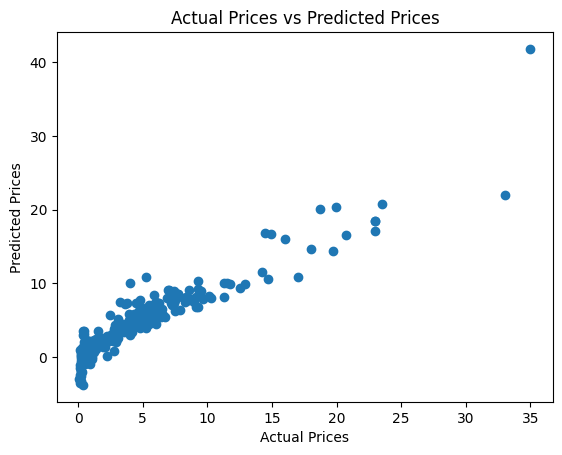

In [81]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

In [82]:
#prediction on test data
test_data_prediction=linear_model.predict(X_test)

In [83]:
# r squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8365766715027051


In [84]:
# Mean absolute error, Mean squared error and root mean squared error
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
mse_test = metrics.mean_squared_error(Y_test, test_data_prediction)
rmse_test = mse_test ** 0.5

print("Mean Absolute Error (MAE) – Test:", mae_test)
print("Mean Squared Error (MSE) – Test:", mse_test)
print("Root Mean Squared Error (RMSE) – Test:", rmse_test)


Mean Absolute Error (MAE) – Test: 1.1516382156613783
Mean Squared Error (MSE) – Test: 2.1501299189836294
Root Mean Squared Error (RMSE) – Test: 1.4663321311979867


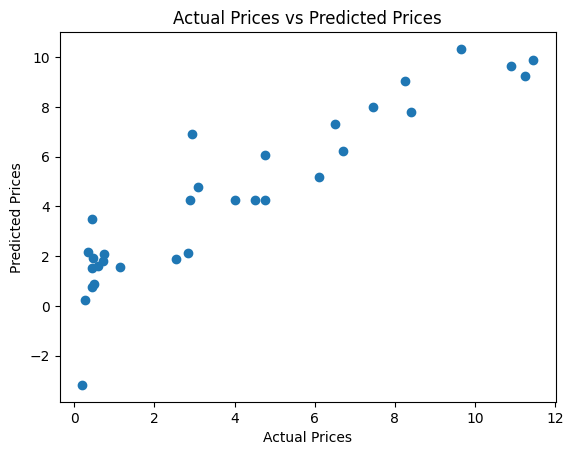

In [85]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


LASSO Regression

In [86]:
#lasso regression model
las_model=Lasso()

In [87]:
las_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [88]:
#prediction on training data
training_data_prediction=las_model.predict(X_train)

In [89]:
print(X_train)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
204  2015          4.430       28282  ...            0             0      0
249  2016          7.600       17000  ...            0             0      0
277  2015         13.600       21780  ...            0             0      0
194  2008          0.787       50000  ...            1             0      0
244  2013          9.400       49000  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
75   2015          6.800       36000  ...            0             0      0
22   2011          8.010       50000  ...            0             1      0
72   2013         18.610       56001  ...            0             0      0
15   2016         10.790       43000  ...            0             0      0
168  2013          0.730       12000  ...            1             0      0

[270 rows x 7 columns]


In [90]:
# r squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8427856123435794


Mean absolute error
Mean squared error
root mean squared error

In [91]:
mae = metrics.mean_absolute_error(Y_train,training_data_prediction)
mse = metrics.mean_squared_error(Y_train,training_data_prediction)
rmse = mse ** 0.5

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.2863097696916528
Mean Squared Error (MSE): 4.267770970810244
Root Mean Squared Error (RMSE): 2.065858410155508


Visualize the actual prices and predicted prices as close possible

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

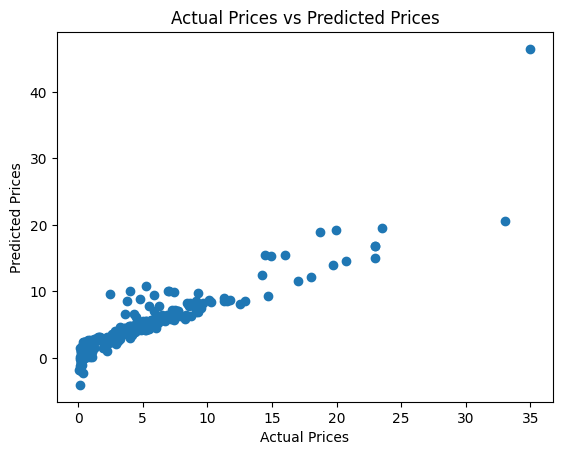

In [92]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

In [93]:
#prediction on test data
test_data_prediction=las_model.predict(X_test)

In [94]:
# r squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8709167941173195


In [95]:
# Mean absolute error, Mean squared error and root mean squared error
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
mse_test = metrics.mean_squared_error(Y_test, test_data_prediction)
rmse_test = mse_test ** 0.5

print("Mean Absolute Error (MAE) – Test:", mae_test)
print("Mean Squared Error (MSE) – Test:", mse_test)
print("Root Mean Squared Error (RMSE) – Test:", rmse_test)


Mean Absolute Error (MAE) – Test: 1.0507413774170433
Mean Squared Error (MSE) – Test: 1.6983234006965484
Root Mean Squared Error (RMSE) – Test: 1.3031973759552113


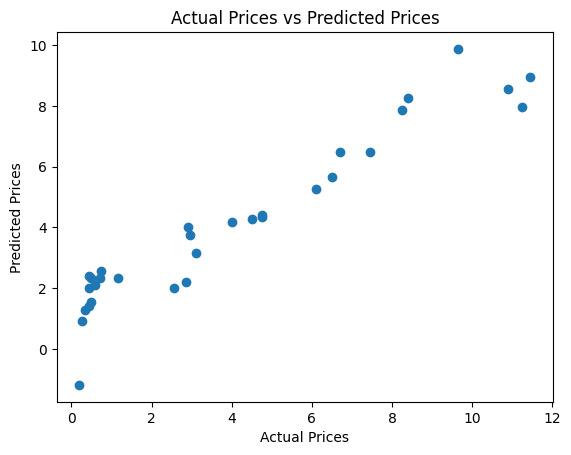

In [96]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


KNN Model

In [97]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

In [98]:
#prediciton on training data
knn_train_pred = knn_model.predict(X_train)

In [99]:
#r squared error
knn_r2_train = metrics.r2_score(Y_train, knn_train_pred)
print("KNN R² Score (Train):", knn_r2_train)

KNN R² Score (Train): 0.3174952034944266


In [100]:
# other errors
knn_mae_train = metrics.mean_absolute_error(Y_train, knn_train_pred)
knn_mse_train = metrics.mean_squared_error(Y_train, knn_train_pred)
knn_rmse_train = knn_mse_train ** 0.5


In [101]:
print("KNN MAE (Train):", knn_mae_train)
print("KNN MSE (Train):", knn_mse_train)
print("KNN RMSE (Train):", knn_rmse_train)

KNN MAE (Train): 2.941333333333333
KNN MSE (Train): 18.52740198518518
KNN RMSE (Train): 4.304346870918418


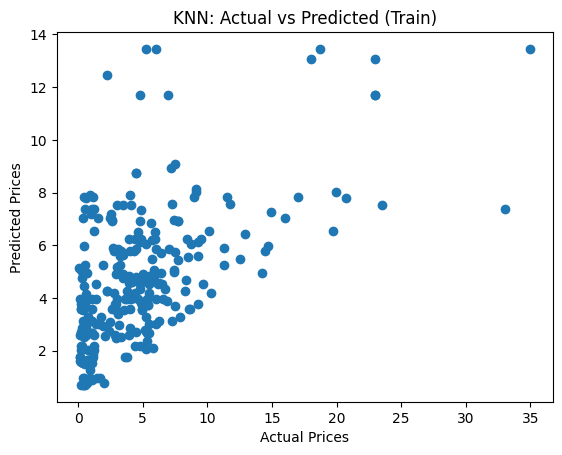

In [102]:
plt.scatter(Y_train, knn_train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("KNN: Actual vs Predicted (Train)")
plt.show()

In [103]:
knn_test_pred = knn_model.predict(X_test)

In [104]:
knn_r2_test = metrics.r2_score(Y_test, knn_test_pred)
print("KNN R² Score (Test):", knn_r2_test)

KNN R² Score (Test): -0.35652677249637743


In [105]:
knn_mae_test = metrics.mean_absolute_error(Y_test, knn_test_pred)
knn_mse_test = metrics.mean_squared_error(Y_test, knn_test_pred)
knn_rmse_test = knn_mse_test ** 0.5

print("KNN MAE (Test):", knn_mae_test)
print("KNN MSE (Test):", knn_mse_test)
print("KNN RMSE (Test):", knn_rmse_test)


KNN MAE (Test): 3.527483870967743
KNN MSE (Test): 17.84756696774194
KNN RMSE (Test): 4.224638087190658


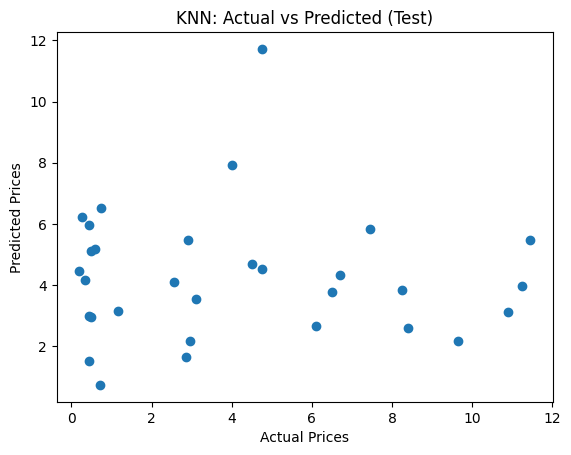

In [106]:
plt.scatter(Y_test, knn_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("KNN: Actual vs Predicted (Test)")
plt.show()